## Environment Setup

In [1]:
#!pip install openpyxl

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


import sys
sys.path.insert (0, './_functions_/')
from functions_eda import *

## Datasets

In [3]:
df = merge_excel_sheets("./raw_data/02__autos_nach_bundesland_kraftstoff.xlsx")
df.head()

,Land,Kraftstoffart,Kraftfahrzeuge \ninsgesamt,Year
0,Baden-Württemberg,Benzin,5003238,2019
1,Baden-Württemberg,Diesel,2984960,2019
2,Baden-Württemberg,Gas insgesamt,49062,2019
3,Baden-Württemberg,Elektro,19508,2019
4,Baden-Württemberg,Hybrid insgesamt,52055,2019


## Handling missing values

Check for NaNs

In [4]:
df.isnull().sum()

Land                            0
Kraftstoffart                 126
Kraftfahrzeuge \ninsgesamt      0
Year                            0
dtype: int64

The lines that contain no Kraftstoffart are the ones that include totals, therefore we will replace with the value 'Total'

In [5]:
# the lines that contain no Kraftstoffart are the ones that include totals, therefore we will replace with the value 'Total'
df['Kraftstoffart'] = df['Kraftstoffart'].fillna('Total') 
df

,Land,Kraftstoffart,Kraftfahrzeuge \ninsgesamt,Year
0,Baden-Württemberg,Benzin,5003238,2019
1,Baden-Württemberg,Diesel,2984960,2019
2,Baden-Württemberg,Gas insgesamt,49062,2019
3,Baden-Württemberg,Elektro,19508,2019
4,Baden-Württemberg,Hybrid insgesamt,52055,2019
...,...,...,...,...
1003,Deutschland,Elektro (BEV),1810815,2025
1004,Deutschland,Hybrid insgesamt,3573138,2025
1005,Deutschland,darunter Plug-in,968734,2025
1006,Deutschland,Sonstige,18772,2025


In [6]:
df['Land'].value_counts()

Land
Baden-Württemberg                  49
Bayern                             49
Brandenburg                        49
Berlin                             49
Schleswig-Holstein                 49
Thüringen                          49
Hamburg                            49
Bremen                             49
Niedersachsen                      49
Nordrhein-Westfalen                49
Mecklenburg-Vorpommern             49
Hessen                             49
Sachsen                            49
Sachsen-Anhalt                     49
Deutschland                        49
Sonstige                           49
Saarland                           49
Rheinland-Pfalz                    49
Bayern zusammen                     7
Baden-Württemberg zusammen          7
Nordrhein-Westfalen zusammen        7
Niedersachsen zusammen              7
Hessen zusammen                     7
Mecklenburg-Vorpommern zusammen     7
Brandenburg zusammen                7
Berlin zusammen                     7
Bremen 

In [7]:
#remove the text "zusammen" or "insgesamt" from the Land
df['Land'] = df['Land'].str.replace(r'\s+zusammen$', '', regex=True)
df['Land'] = df['Land'].str.replace(r'\s+insgesamt$', '', regex=True)


In [8]:
df['Land'].value_counts()

Land
Baden-Württemberg         56
Bayern                    56
Berlin                    56
Brandenburg               56
Bremen                    56
Hamburg                   56
Hessen                    56
Mecklenburg-Vorpommern    56
Niedersachsen             56
Nordrhein-Westfalen       56
Rheinland-Pfalz           56
Saarland                  56
Sachsen                   56
Sachsen-Anhalt            56
Schleswig-Holstein        56
Thüringen                 56
Sonstige                  56
Deutschland               56
Name: count, dtype: int64

In [9]:
# Remove "Sonstige" from the dataset
df = df[~(df["Land"] =="Sonstige")]
df

,Land,Kraftstoffart,Kraftfahrzeuge \ninsgesamt,Year
0,Baden-Württemberg,Benzin,5003238,2019
1,Baden-Württemberg,Diesel,2984960,2019
2,Baden-Württemberg,Gas insgesamt,49062,2019
3,Baden-Württemberg,Elektro,19508,2019
4,Baden-Württemberg,Hybrid insgesamt,52055,2019
...,...,...,...,...
1003,Deutschland,Elektro (BEV),1810815,2025
1004,Deutschland,Hybrid insgesamt,3573138,2025
1005,Deutschland,darunter Plug-in,968734,2025
1006,Deutschland,Sonstige,18772,2025


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Land                       952 non-null    object
 1   Kraftstoffart              952 non-null    object
 2   Kraftfahrzeuge 
insgesamt  952 non-null    int64 
 3   Year                       952 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 37.2+ KB


In [11]:
df.columns

Index(['Land', 'Kraftstoffart', 'Kraftfahrzeuge \ninsgesamt', 'Year'], dtype='object')

In [12]:
df = df.rename(columns ={'Land':'Land', 'Kraftstoffart':'Fuel', 'Kraftfahrzeuge \ninsgesamt': 'Total cars', 'Year':'Year'})
df

,Land,Fuel,Total cars,Year
0,Baden-Württemberg,Benzin,5003238,2019
1,Baden-Württemberg,Diesel,2984960,2019
2,Baden-Württemberg,Gas insgesamt,49062,2019
3,Baden-Württemberg,Elektro,19508,2019
4,Baden-Württemberg,Hybrid insgesamt,52055,2019
...,...,...,...,...
1003,Deutschland,Elektro (BEV),1810815,2025
1004,Deutschland,Hybrid insgesamt,3573138,2025
1005,Deutschland,darunter Plug-in,968734,2025
1006,Deutschland,Sonstige,18772,2025


In [13]:
# harmonize the types of "fuel"

fuel_type_mapping = {
 'Benzin': 'Benzin', 
 'Diesel': 'Diesel', 
 'Gas insgesamt': 'Gas', 
 'Hybrid insgesamt': 'Hybrid total', 
 'Sonstige': 'Sonstige',
 'Elektro (BEV)': 'Electric', 
 'Elektro': 'Electric', 
 'darunter Plug-in': 'Plug-in Hybrid',
 '  darunter Plug-in': 'Plug-in Hybrid'  
 }

df['Fuel'] = df['Fuel'].replace(fuel_type_mapping)
df["Fuel"].value_counts()


Fuel
Benzin            119
Diesel            119
Gas               119
Electric          119
Hybrid total      119
Plug-in Hybrid    119
Sonstige          119
Total             119
Name: count, dtype: int64

In [14]:
df.head()

,Land,Fuel,Total cars,Year
0,Baden-Württemberg,Benzin,5003238,2019
1,Baden-Württemberg,Diesel,2984960,2019
2,Baden-Württemberg,Gas,49062,2019
3,Baden-Württemberg,Electric,19508,2019
4,Baden-Württemberg,Hybrid total,52055,2019


In [15]:
# one df for deutschland
df_dd = df [df ["Land"] =="Deutschland"].reset_index()
df_dd

,index,Land,Fuel,Total cars,Year
0,136,Deutschland,Benzin,35732397,2019
1,137,Deutschland,Diesel,20591834,2019
2,138,Deutschland,Gas,507768,2019
3,139,Deutschland,Electric,112119,2019
4,140,Deutschland,Hybrid total,342555,2019
5,141,Deutschland,Plug-in Hybrid,67075,2019
6,142,Deutschland,Sonstige,18528,2019
7,143,Deutschland,Total,57305201,2019
8,280,Deutschland,Benzin,36253555,2020
9,281,Deutschland,Diesel,20683724,2020


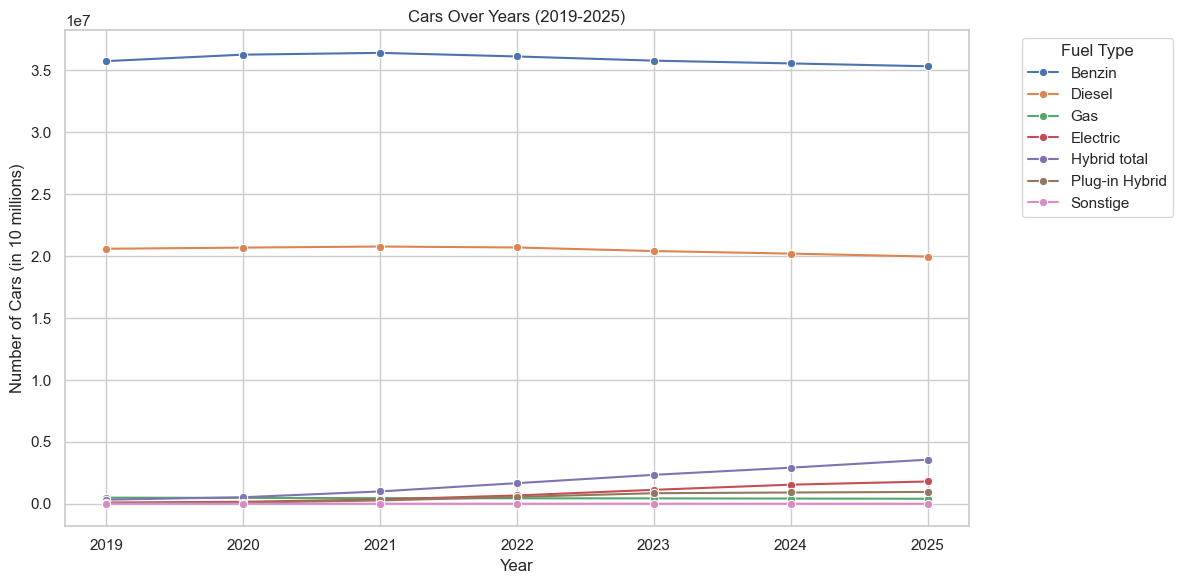

In [16]:
# Set the plot style
sns.set_style("whitegrid")

df_filtered = df_dd[df_dd["Fuel"] != "Total"]

# Pivot the data to get years on x-axis and fuel types as separate lines
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x="Year", y="Total cars", hue="Fuel", marker="o")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Number of Cars (in 10 millions)")
plt.title("Cars Over Years (2019-2025)")

# Move legend outside
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout to fit legend
plt.tight_layout()
plt.show()

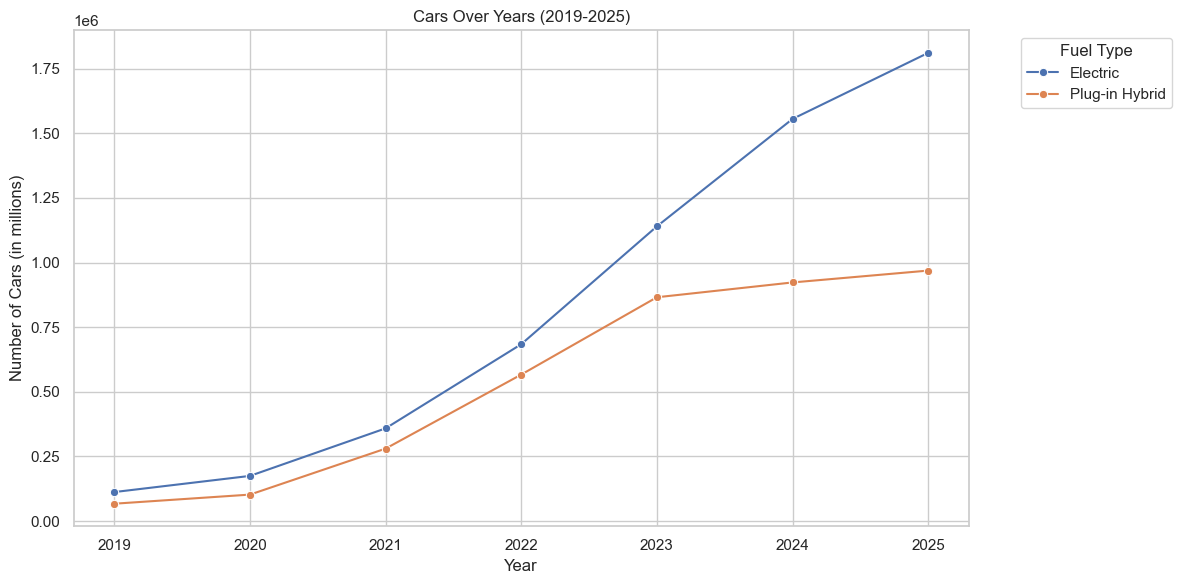

In [17]:
# Set the plot style
sns.set_style("whitegrid")

df_electric = df_dd[df_dd["Fuel"].isin(["Electric", "Plug-in Hybrid"])]

# Pivot the data to get years on x-axis and fuel types as separate lines
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_electric, x="Year", y="Total cars", hue="Fuel", marker="o")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Number of Cars (in millions)")
plt.title("Cars Over Years (2019-2025)")

# Move legend outside
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout to fit legend
plt.tight_layout()
plt.show()

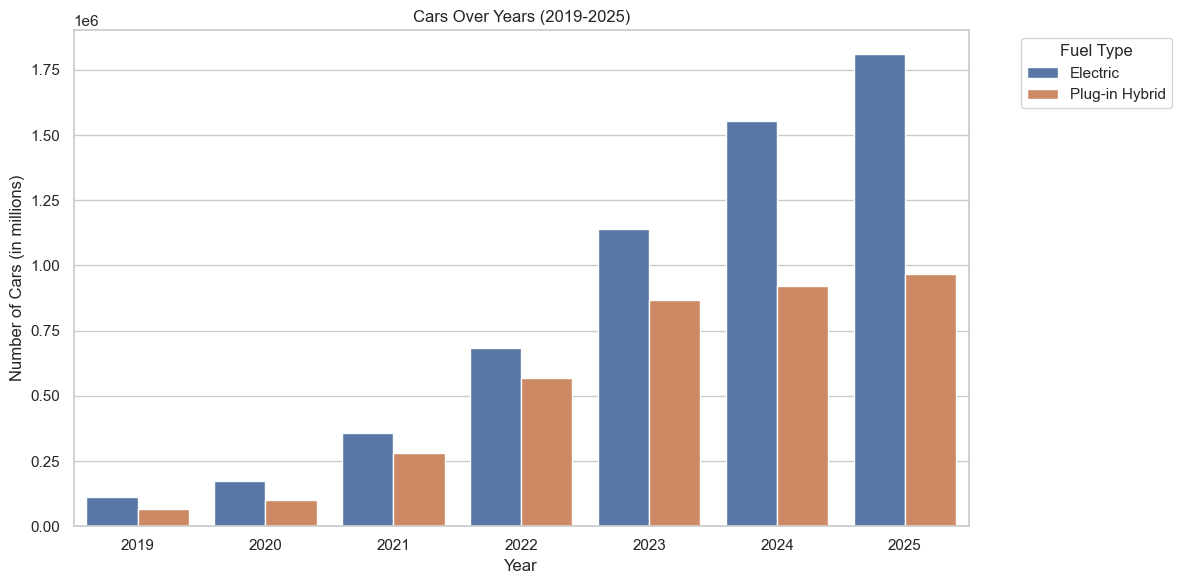

In [18]:
# Set the plot style
sns.set_style("whitegrid")

df_electric = df_dd[df_dd["Fuel"].isin(["Electric", "Plug-in Hybrid"])]

# Pivot the data to get years on x-axis and fuel types as separate lines
plt.figure(figsize=(12, 6))
sns.barplot(data=df_electric, x="Year", y="Total cars", hue="Fuel")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Number of Cars (in millions)")
plt.title("Cars Over Years (2019-2025)")

# Move legend outside
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout to fit legend
plt.tight_layout()
plt.show()

In [19]:
# Remove "Deutschland" from the dataset, as it contains aggregations
df = df[~(df["Land"] =="Deutschland")]
df

,Land,Fuel,Total cars,Year
0,Baden-Württemberg,Benzin,5003238,2019
1,Baden-Württemberg,Diesel,2984960,2019
2,Baden-Württemberg,Gas,49062,2019
3,Baden-Württemberg,Electric,19508,2019
4,Baden-Württemberg,Hybrid total,52055,2019
...,...,...,...,...
987,Thüringen,Electric,23915,2025
988,Thüringen,Hybrid total,73958,2025
989,Thüringen,Plug-in Hybrid,15529,2025
990,Thüringen,Sonstige,449,2025


In [20]:
df.to_csv('./clean_data/cars_based_on_fuel_per_year.csv',  index=False)

Since we are only interested in E-Autos and the rest, we will convert the data again

In [21]:
df_filtered = df.copy()
fuel_type_mapping2 = {
 'Benzin': 'Others', 
 'Diesel': 'Others', 
 'Gas': 'Others',  
 'Sonstige': 'Others',
 'Hybrid': 'Others',  
 'Electric': 'Electric',
 'Hybrid E': 'Plug-in Hybrid'  
 }

df_filtered['Fuel'] = df_filtered['Fuel'].replace(fuel_type_mapping2)
df_filtered["Fuel"].value_counts()

Fuel
Others            448
Electric          112
Hybrid total      112
Plug-in Hybrid    112
Total             112
Name: count, dtype: int64

In [22]:
df_filtered.to_csv('./clean_data/cars_based_on_fuel_per_year_filtered.csv',  index=False)

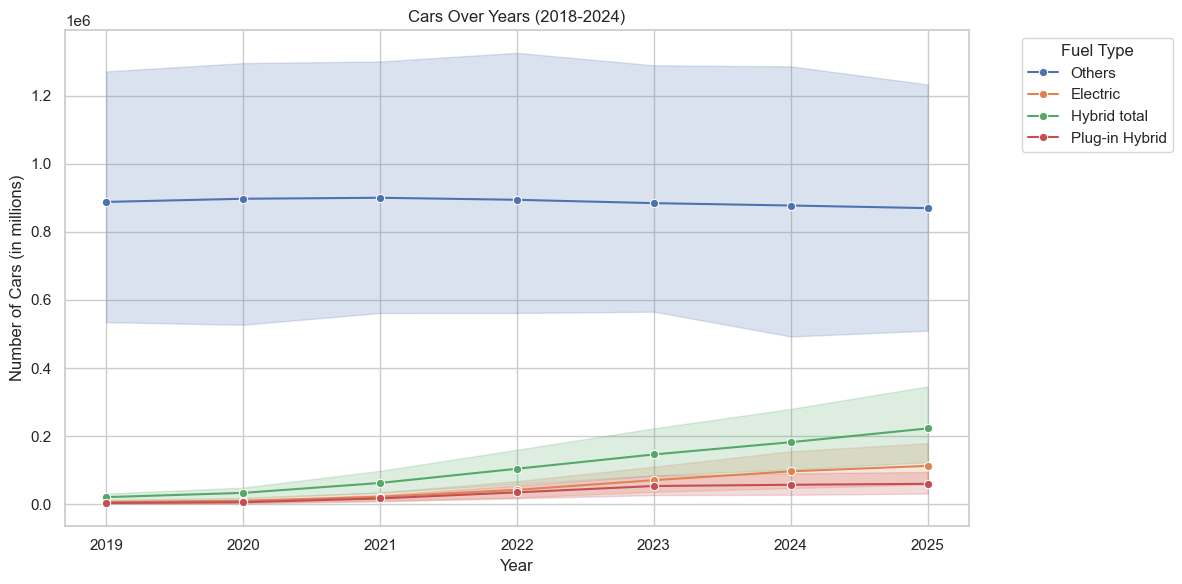

In [23]:
# Set the plot style
sns.set_style("whitegrid")

df_electric = df_filtered[df_filtered["Fuel"] != "Total"]

# Pivot the data to get years on x-axis and fuel types as separate lines
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_electric, x="Year", y="Total cars", hue="Fuel", marker="o")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Number of Cars (in millions)")
plt.title("Cars Over Years (2018-2024)")

# Move legend outside
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout to fit legend
plt.tight_layout()
plt.show()

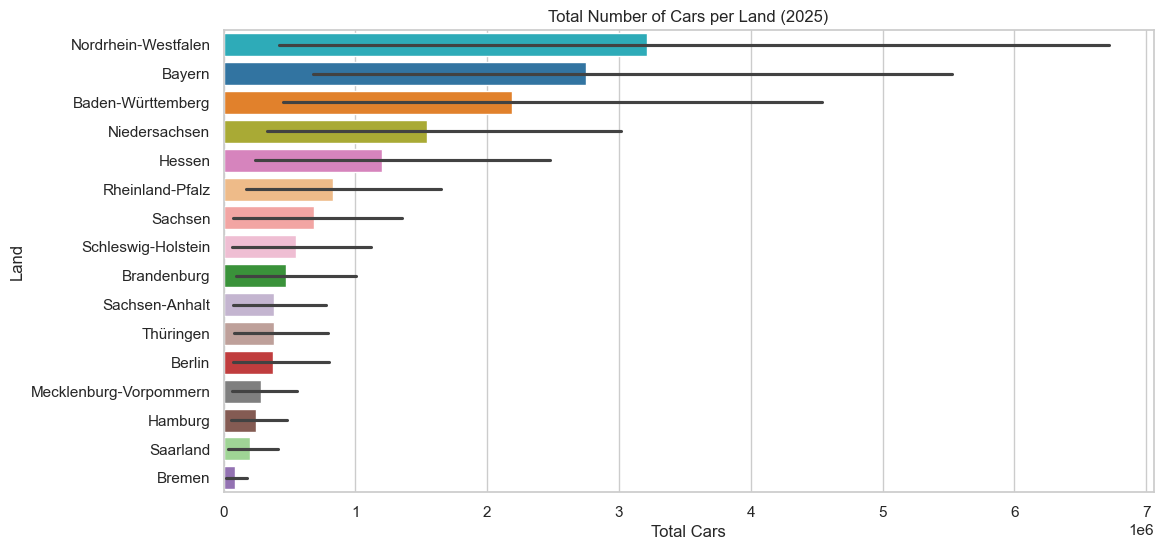

In [24]:
# Filter data for 2025
df_2025 = df_filtered[df_filtered["Year"] == 2025]

# Sort by total number of cars for better visualization
df_2025 = df_2025.sort_values(by="Total cars", ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_2025, x="Total cars", y="Land", palette=german_states_colors)

# Labels and title
plt.xlabel("Total Cars")
plt.ylabel("Land")
plt.title("Total Number of Cars per Land (2025)")

# Show the plot
plt.show()


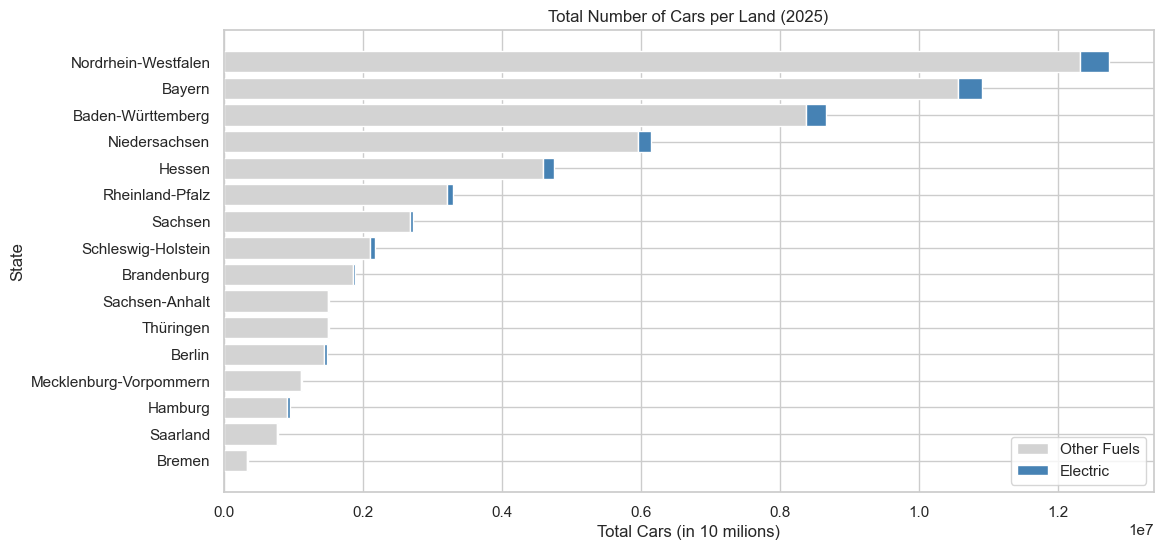

In [25]:
# Filter data for 2025
df_2025 = df_filtered[df_filtered["Year"] == 2025]

# Pivot table to get total cars by fuel type for each Land
df_pivot = df_2025.pivot_table(index="Land", columns="Fuel", values="Total cars", aggfunc="sum")

# Sort by total number of cars for better visualization
df_pivot = df_pivot.sort_values(by="Total", ascending=True)

# Handle missing values (if some states don't have electric cars)
df_pivot = df_pivot.fillna(0)

# Compute non-electric cars
df_pivot["Non_Electric"] = df_pivot["Total"] - df_pivot["Electric"]

# Plot stacked bar chart
plt.figure(figsize=(12, 6))

plt.barh(df_pivot.index, df_pivot["Non_Electric"], color="lightgray", label="Other Fuels")
plt.barh(df_pivot.index, df_pivot["Electric"], left=df_pivot["Non_Electric"], color="steelblue", label="Electric")

# Labels and title
plt.xlabel("Total Cars (in 10 milions)")
plt.ylabel("State")
plt.title("Total Number of Cars per Land (2025)")
plt.legend()

# Show the plot
plt.show()



In [26]:
eautos_2023 = df_filtered[(df_filtered["Fuel"] == "Electric") & (df_filtered["Year"] == 2023) ]
eautos_2023 = eautos_2023[['Land', 'Total cars']]

eautos_2023.to_csv("./clean_data/eautos_2023.csv", index = False)


In [27]:
def plot_stacked_bar_for_state(df, land, colors):
    """
    Creates a stacked bar plot showing the number of electric vs. other fuel cars over different years for a given Land.

    Parameters:
        df (pd.DataFrame): The dataset containing columns 'Land', 'Fuel', 'Total cars', and 'Year'.
        land (str): The name of the Land (state) to visualize.
        german_states_colors (dict): A dictionary mapping German states to colors.
    """

    # Filter data for the selected Land
    df_land = df[df["Land"] == land]

    # Pivot table to get fuel types as columns and years as index
    df_pivot = df_land.pivot_table(index="Year", columns="Fuel", values="Total cars", aggfunc="sum")

    # Handle missing values (if some years don't have electric cars)
    df_pivot = df_pivot.fillna(0)

    # Compute non-electric cars
    df_pivot["Non_Electric"] = df_pivot["Total"] - df_pivot["Electric"]

    # Create figure
    plt.figure(figsize=(10, 6))
    
    # Set bar width
    bar_width = 0.5  # Adjusted from default 0.8 to make bars slimmer
    
    # Plot "Non_Electric" in the state's assigned color
    plt.bar(df_pivot.index, df_pivot["Non_Electric"], color=german_states_colors.get(land, "black"), label="Other Fuels", width=bar_width)

    # Plot "Electric" on top in gray
    plt.bar(df_pivot.index, df_pivot["Electric"], bottom=df_pivot["Non_Electric"], color="gray", label="Electric", width=bar_width)


    # Add text labels for electric percentage
    for year in df_pivot.index:
        total = df_pivot.loc[year, "Total"]
        electric = df_pivot.loc[year, "Electric"]
        percent = (electric / total) * 100 if total > 0 else 0

        plt.text(year, total * 1.02, f"{percent:.1f}%", ha='center', fontsize=10, color="black")

    # Labels and title
    plt.xlabel("Year")
    plt.ylabel("Total Cars")
    plt.title(f"Electric vs Other Cars in {land} Over the Years")
    plt.xticks(df_pivot.index)  # Ensure all years are shown
    plt.legend()

    # Show the plot
    plt.show()


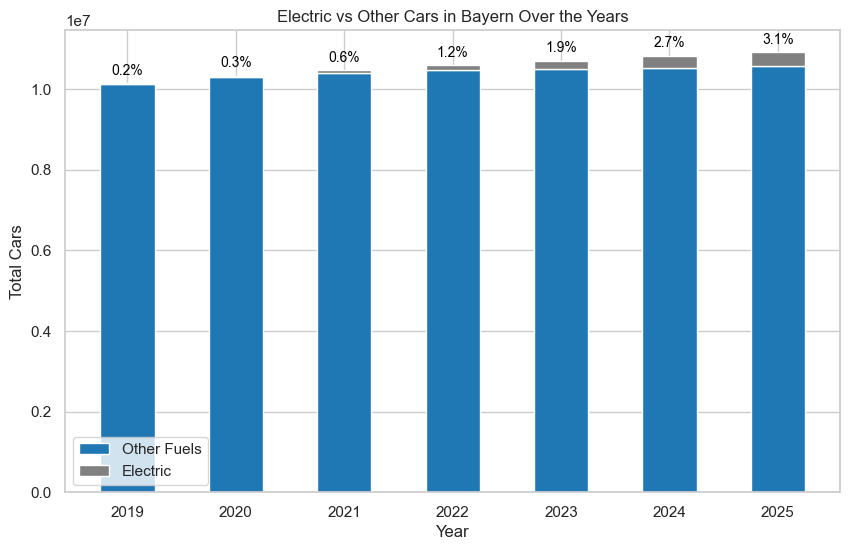

In [28]:
plot_stacked_bar_for_state(df = df_filtered, land ='Bayern', colors= german_states_colors)

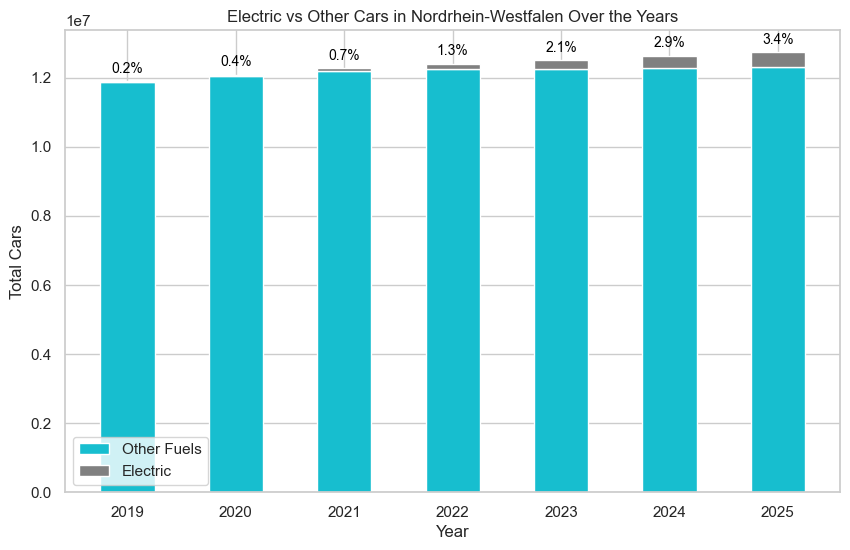

In [29]:
plot_stacked_bar_for_state(df = df_filtered, land ='Nordrhein-Westfalen', colors= german_states_colors)

In [32]:
import matplotlib.pyplot as plt

def plot_line_chart_for_state(df, land, colors):
    """
    Creates a line chart showing the number of electric vs. other fuel cars over different years for a given Land.

    Parameters:
        df (pd.DataFrame): The dataset containing columns 'Land', 'Fuel', 'Total cars', and 'Year'.
        land (str): The name of the Land (state) to visualize.
        colors (dict): A dictionary mapping fuel types to colors for the line chart.
    """

    # Filter data for the selected Land
    df_land = df[df["Land"] == land]

    # Pivot table to get fuel types as columns and years as index
    df_pivot = df_land.pivot_table(index="Year", columns="Fuel", values="Total cars", aggfunc="sum")

    # Handle missing values (if some years don't have electric cars)
    df_pivot = df_pivot.fillna(0)

    # Compute non-electric cars
    if "Electric" in df_pivot.columns:
        df_pivot["Non_Electric"] = df_pivot["Total"] - df_pivot["Electric"]
    else:
        df_pivot["Non_Electric"] = df_pivot["Total"]  # If no electric data exists, assume all cars are non-electric

    # Create figure
    plt.figure(figsize=(10, 6))

    # Plot line chart for "Non_Electric" cars
    plt.plot(df_pivot.index, df_pivot["Non_Electric"], color=german_states_colors.get(land, "black"), label="Other Fuels", marker='o')

    # Plot line chart for "Electric" cars
    plt.plot(df_pivot.index, df_pivot["Electric"], color="gray", label="Electric", marker='o')

    # Add text labels for electric percentage on each point
    for year in df_pivot.index:
        total = df_pivot.loc[year, "Total"]
        electric = df_pivot.loc[year, "Electric"]
        percent = (electric / total) * 100 if total > 0 else 0
        plt.text(year, electric + 0.05 * total, f"{percent:.1f}%", ha='center', fontsize=10, color="black")

    # Labels and title
    plt.xlabel("Year")
    plt.ylabel("Total Cars")
    plt.title(f"Electric vs Other Cars in {land} Over the Years")
    plt.xticks(df_pivot.index)  # Ensure all years are shown
    plt.legend()

    # Show the plot
    plt.show()


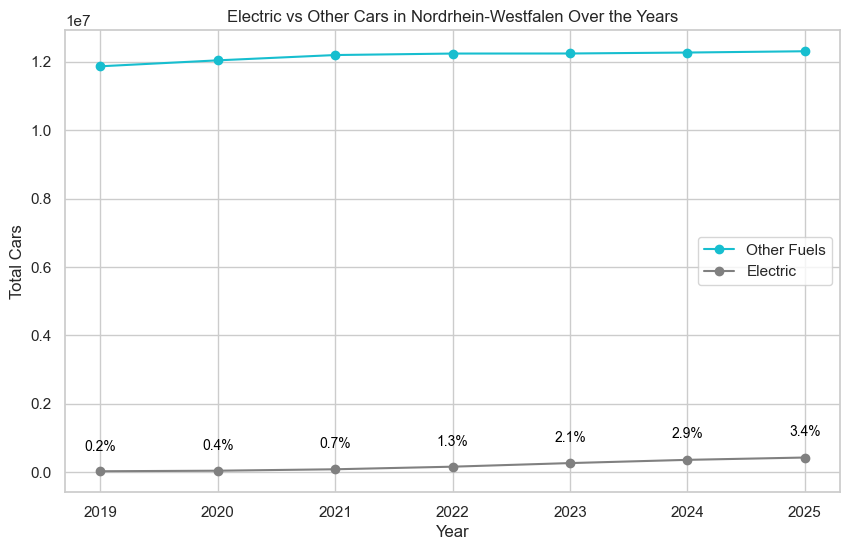

In [33]:
plot_line_chart_for_state(df = df_filtered, land ='Nordrhein-Westfalen', colors= german_states_colors)

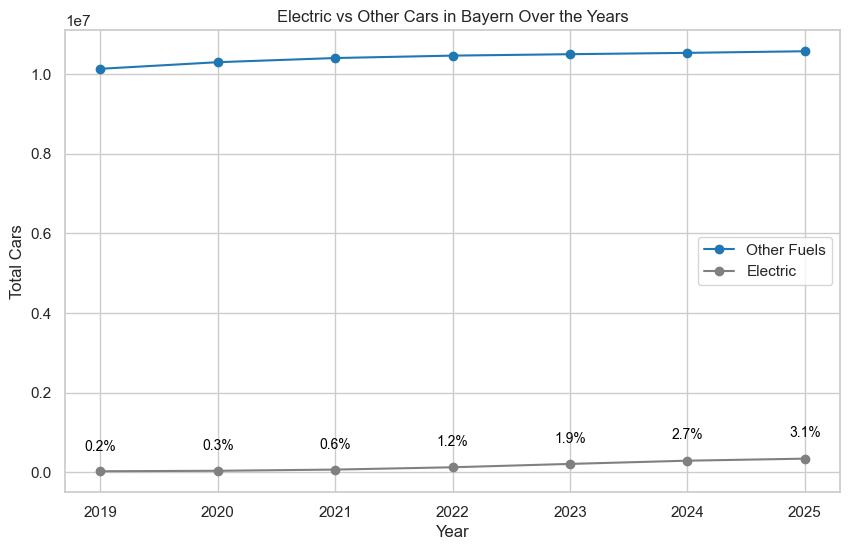

In [34]:
plot_line_chart_for_state(df = df_filtered, land ='Bayern', colors= german_states_colors)